In [16]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
# 1. Download sunspot dataset and upload the same to dataset directory
#    Load the sunspot dataset as an Array


In [71]:
df = pd.read_csv("C:\\DCU\\Main\\full_datasets\\fact_price_monthly_dairy.csv")
df.price = df.price.fillna(np.mean(df.price))
df.head()

,id,yearmonth,geo,unit,product,price,source
0,291650,201712,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
1,291649,201711,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
2,291648,201710,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
3,291647,201709,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
4,291646,201708,CHINA,EUR/kg,milk,1.448498,clal_dairy_price


In [72]:
df[['Year']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}".format(s[0:4]))
df[['Month']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}".format(s[4:6]))
df.head()

,id,yearmonth,geo,unit,product,price,source,Year,Month
0,291650,201712,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,12
1,291649,201711,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,11
2,291648,201710,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,10
3,291647,201709,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,09
4,291646,201708,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,08


In [89]:
df[['str_date']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}/{}".format(s[:4],s[4:6]))

In [74]:
df = df.sort_values(by=["Year","Month"])

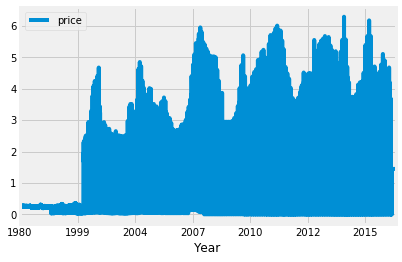

In [75]:
df.plot(x='Year', y='price')

In [76]:
df_year= df[df.Year=="2004"]

In [77]:
df_year = df_year.sort_values(by=["Month"])

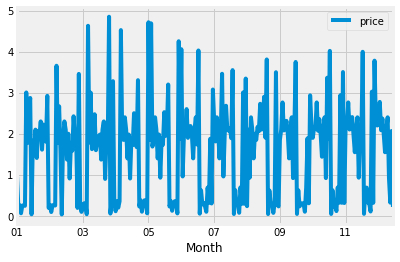

In [78]:
df_year.plot(x='Month', y='price')

In [ ]:
df = df.set_index("str_date")

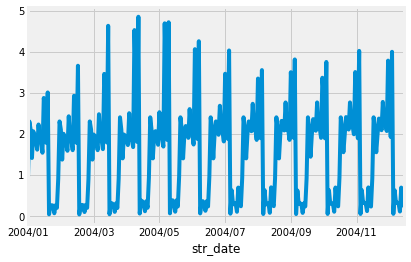

In [86]:
from pandas import datetime
from matplotlib import pyplot
 
#series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df_year= df[df.Year=="2004"]
df_plot = df_year["price"]
df_plot.plot()
pyplot.show()
#df.head()

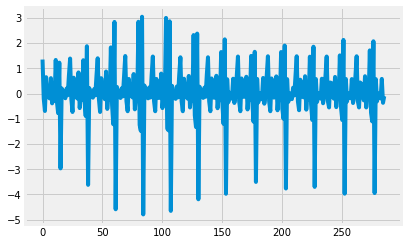

In [87]:
X = df_plot.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

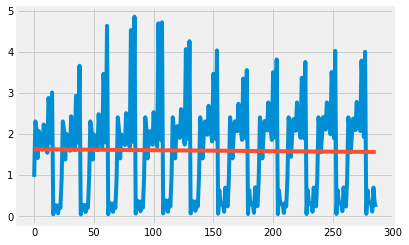

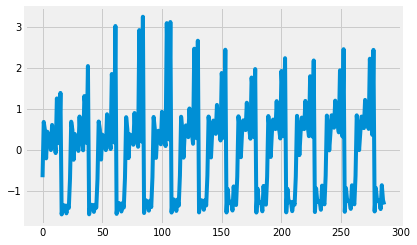

In [88]:
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
 

# fit linear model
X = [i for i in range(0, len(df_plot))]
X = numpy.reshape(X, (len(X), 1))
y = df_plot.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(df_plot))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()